# **인공지능과 가위바위보 하기**

In [4]:
!pip install pillow
!ls

drive  sample_data


In [5]:
from PIL import Image
import os, glob
import numpy as np


**데이터 준비 및 전처리**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# 가위 이미지를 28x28로 사이즈 조정
image_dir_path = "/content/drive/MyDrive/코드 및 데이터파일/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

# 바위 이미지를 28x28로 사이즈 조정
rock_dir_path = "/content/drive/MyDrive/코드 및 데이터파일/rock_scissor_paper/rock"
rock_images = glob.glob(rock_dir_path + "/*.jpg")

target_size=(28,28)
for img in rock_images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")


# 보 이미지를 28x28로 사이즈 조정
paper_dir_path = "/content/drive/MyDrive/코드 및 데이터파일/rock_scissor_paper/paper"
paper_images = glob.glob(paper_dir_path + "/*.jpg")

target_size = (28,28)
for img in paper_images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
이미지 디렉토리 경로:  /content/drive/MyDrive/코드 및 데이터파일/rock_scissor_paper/scissor


In [18]:
from sklearn.model_selection import train_test_split
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=6900   # 각 2300의 이미지 활용.
    img_size=28
    color=3
    #matrix 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/코드 및 데이터파일/rock_scissor_paper/"
x, y = load_data(image_dir_path)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 6900 입니다.
x_train shape: (5520, 28, 28, 3)
y_train shape: (5520,)
x_test shape: (1380, 28, 28, 3)
y_test shape: (1380,)


라벨 :  2


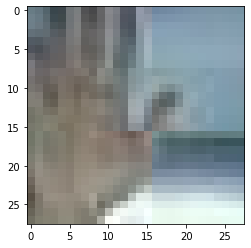

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨 : ', y_train[0])

**모델 설계하기**

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [22]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
173/173 [==============================] - 13s 72ms/step - loss: 1.0058 - accuracy: 0.4817
Epoch 2/10
173/173 [==============================] - 13s 74ms/step - loss: 0.6035 - accuracy: 0.7574
Epoch 3/10
173/173 [==============================] - 13s 75ms/step - loss: 0.3547 - accuracy: 0.8761
Epoch 4/10
173/173 [==============================] - 13s 74ms/step - loss: 0.2280 - accuracy: 0.9268
Epoch 5/10
173/173 [==============================] - 13s 74ms/step - loss: 0.1355 - accuracy: 0.9580
Epoch 6/10
173/173 [==============================] - 13s 78ms/step - loss: 0.1147 - accuracy: 0.9647
Epoch 7/10
173/173 [==============================] - 13s 74ms/step - loss: 0.0724 - accuracy: 0.9828
Epoch 8/10
173/173 [==============================] - 13s 76ms/step - loss: 0.0495 - accuracy: 0.9870
Epoch 9/10
173/173 [==============================] - 13s 74ms/step - loss: 0.0484 - accuracy: 0.9859
Epoch 10/10
173/173 [==============================] - 13s 73ms/step - loss: 0.053

In [23]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

44/44 - 1s - loss: 46.8984 - accuracy: 0.9043 - 931ms/epoch - 21ms/step
test_loss: 46.89841079711914 
test_accuracy: 0.904347836971283


## **Summary**

초기에 직접 만든 데이터셋으로만 활용했을 때, 40%대의 낮은 인식율을 보여줬다.  
train 데이터의 부족으로 판단되어, 가위 바위 보 각 사진 2300개의 데이터 셋을 추가하여 진행했다.  
결과적으로, 90% 이상의 정확도를 보여주었다.


개인적인 느낌으로, 데이터셋 자체가 전반적으로 양질의 퀄리티를 가졌기에 모델의 추가적인 조정없이 이러한 결과를 나타낸 것 같다.  
앞으로 배우게 될 여러가지 모델들을 학습하며,  
어떠한 상황에서 어떠한 구조가 유리한지 중점적으로 살펴보는 과정이 필요할 것이라고 생각한다.